In [71]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import scipy as sp
import cv2
import skimage.io as io
from sklearn.datasets import make_blobs 

In [72]:
X,y = make_blobs(n_samples= 500, centers = 5)
print(X.shape,y.shape)

(500, 2) (500,)


/home/akhil/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


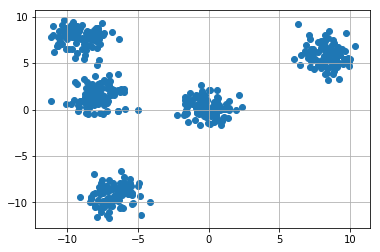

In [73]:
plt.figure(0)
plt.grid("on")
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [99]:
#Get data
print(X.shape)

(500, 2)


In [127]:
#create initial clusters
k = 5

colors = ['green', 'blue', 'red', 'yellow', 'orange', 'pink']

clusters = {}

for kx in range(k):
    center = 10.0*((2*np.random.random(2,)) - 1)
    points = []
    cluster = {
        'center' : center,
        'points' : points,
        'color' : colors[kx]
    }
    clusters[kx] = cluster
print(clusters)

{0: {'center': array([-8.89514588, -2.86150522]), 'points': [], 'color': 'green'}, 1: {'center': array([ 4.76522281, -8.11978253]), 'points': [], 'color': 'blue'}, 2: {'center': array([ 8.63278626, -6.72080932]), 'points': [], 'color': 'red'}, 3: {'center': array([3.74443563, 9.61521066]), 'points': [], 'color': 'yellow'}, 4: {'center': array([4.35865498, 5.26291233]), 'points': [], 'color': 'orange'}}


In [30]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

/home/akhil/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


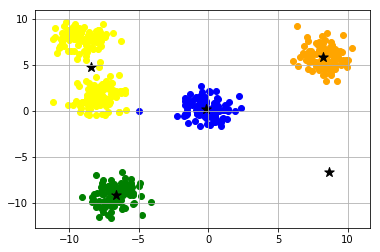

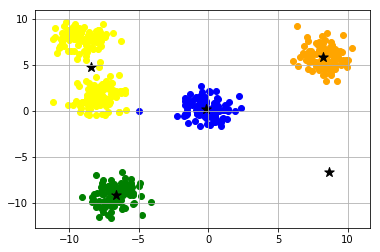

In [191]:
# For each point in dataset
for ix in range(X.shape[0]):
    dist = []
    curr_x = X[ix]
    
    for kx in range(k):
        d = distance(curr_x, clusters[kx]['center'])
        dist.append(d)
    # Get the respective cluster for this point
    current_cluster_id = np.argmin(dist)
    
    clusters[current_cluster_id]['points'].append(curr_x)
    
#########################################################################################################
    
for kx in range(k):
    pts = np.array(clusters[kx]['points'])
    # print pts.shape
    clusters[kx]['coords'] = pts


    
plt.figure(0)
plt.grid("on")
for kx in range(k):
    pts = clusters[kx]['coords']
    try:
        plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'])
    except:
        pass
    
    center = clusters[kx]['center']
    plt.scatter(center[0], center[1], color='black', s=100, marker='*')

###########################################################################################################    

for kx in range(k):
    if clusters[kx]['coords'].shape[0] > 0:
        new_center = clusters[kx]['coords'].mean(axis=0)
    else:
        new_center = clusters[kx]['center']
    clusters[kx]['center'] = new_center
    clusters[kx]['points'] = []
    

plt.figure(1)
plt.grid("on")
for kx in range(k):
    pts = clusters[kx]['coords']
    try:
        plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'])
    except:
        pass
    
    center = clusters[kx]['center']
    plt.scatter(center[0], center[1], color='black', s=100, marker='*')